<a href="https://colab.research.google.com/github/atalaydenknalbant/BikeHourly/blob/main/BikeHourly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bikes Rented Each Hours

## Import Libraries

In [ ]:
from featurewiz import featurewiz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import model_selection
import requests
from zipfile import ZipFile
from io import BytesIO

## Load and Inspect Dataset

In [ ]:
response = requests.get("https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip")
zip_content = BytesIO(response.content)

with ZipFile(zip_content) as zipfile:
    zipfile.extractall("bike_sharing_data")

df = pd.read_csv("bike_sharing_data/hour.csv")
df.head()
df_copy = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [ ]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Explatory Data Analysis

#### Check NaN Values

In [ ]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Convert dteday to datetime

In [ ]:
df['dteday'] = pd.to_datetime(df['dteday'])
df_copy['dteday'] = pd.to_datetime(df_copy['dteday'])

#### Convert categories

In [ ]:
for col in ['season' , 'mnth' , 'hr' , 'holiday' , 'weekday' , 'workingday' , 'weathersit']:
    df[col] = df[col].astype('category')

### Visualization of Data

#### Distribution of Bike Rentals Across Different Hours of the Day

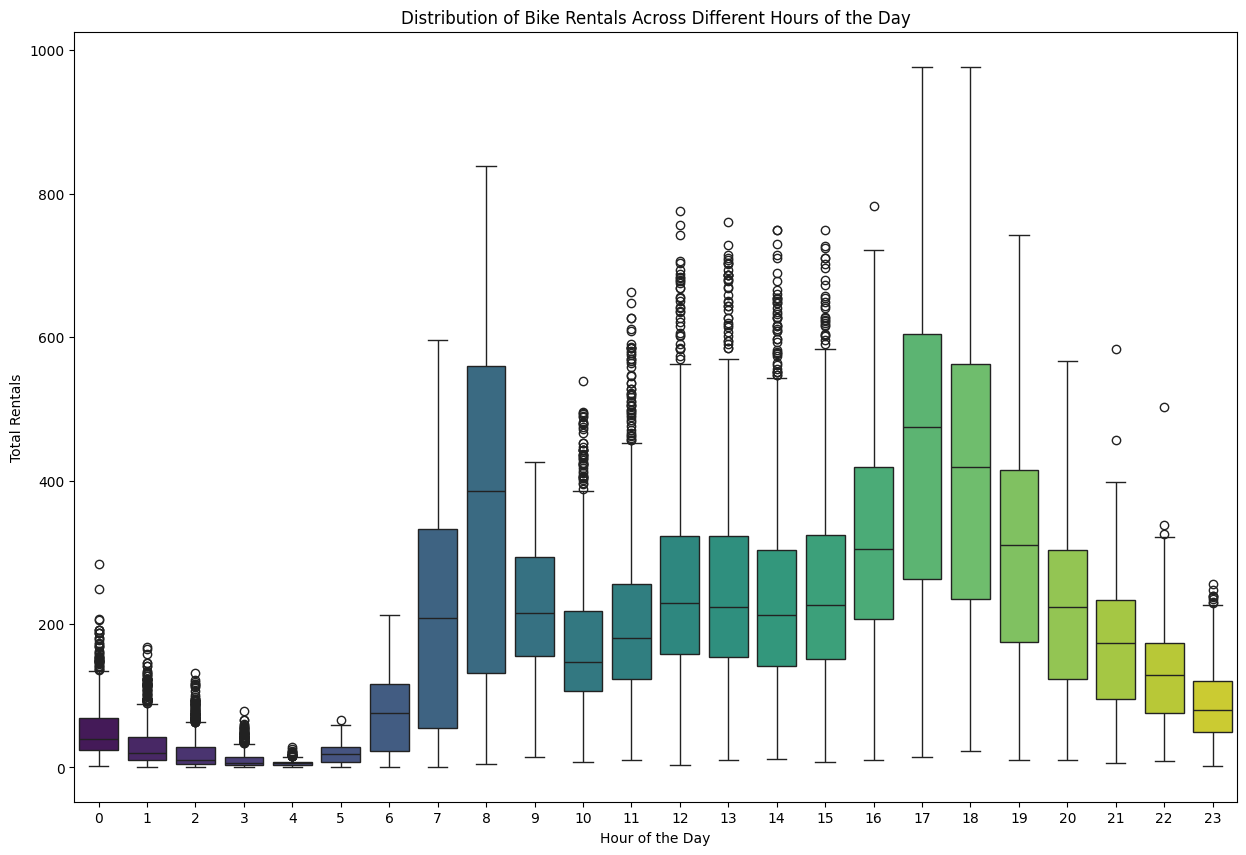

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=df, x='hr', y='cnt', hue='hr', ax=ax, palette='viridis', legend=False)
ax.set_title('Distribution of Bike Rentals Across Different Hours of the Day')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Total Rentals')
plt.show()

#### Bike Rentals Across Different Seasons

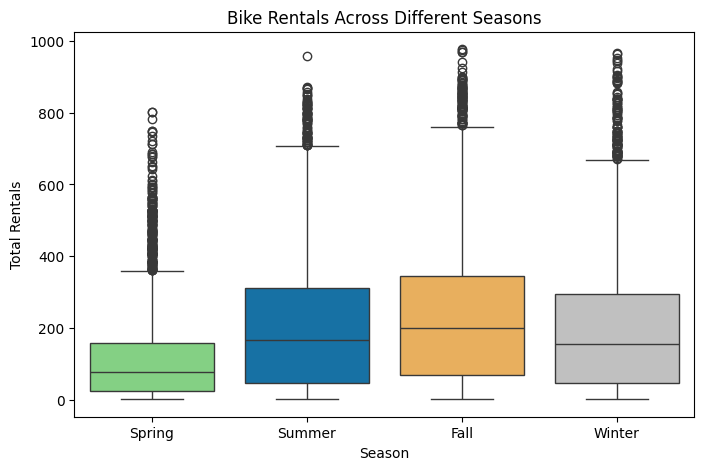

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df, x='season', y='cnt', hue='season', ax=ax, palette=["#77dd77", "#0077bb", "#ffb347", "#c0c0c0"] , legend=False)
ax.set_title('Bike Rentals Across Different Seasons')
ax.set_xlabel('Season')
ax.set_ylabel('Total Rentals')
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

#### Impact of Weather Conditions on Bike Rentals

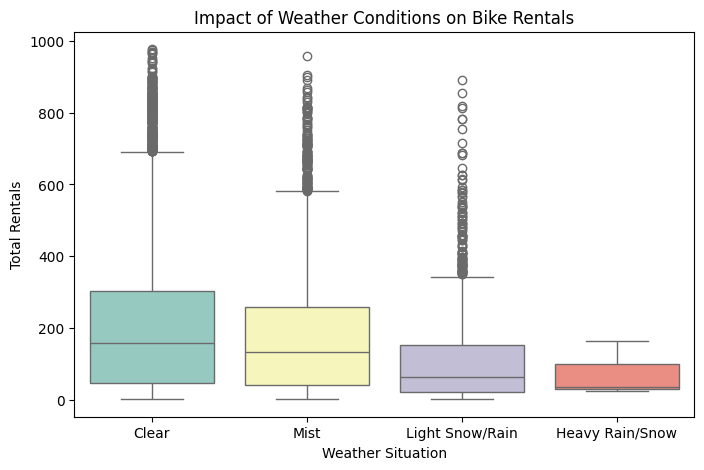

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df, x='weathersit', y='cnt', hue='weathersit', ax=ax, palette='Set3', legend=False)
ax.set_title('Impact of Weather Conditions on Bike Rentals')
ax.set_xlabel('Weather Situation')
ax.set_ylabel('Total Rentals')
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.show()

####  Proportion of Rentals on Holidays vs Non-holidays

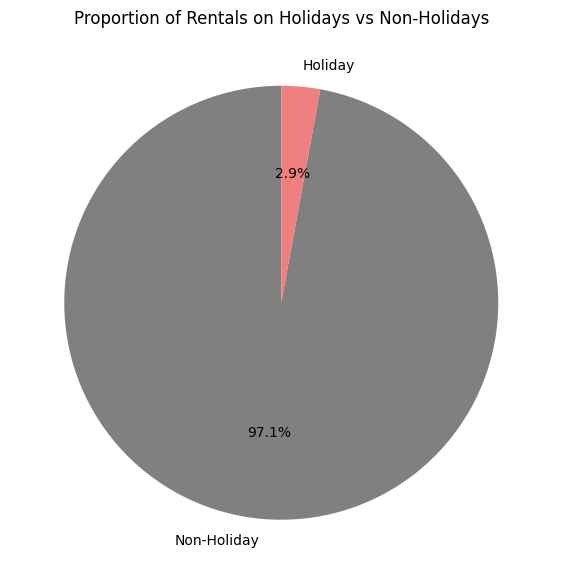

In [ ]:
fig, ax = plt.subplots(figsize=(7, 10))
plt.pie(df['holiday'].value_counts(), labels=['Non-Holiday', 'Holiday'], autopct='%1.1f%%', startangle=90, colors=['gray', 'lightcoral'])
ax.set_title('Proportion of Rentals on Holidays vs Non-Holidays')
plt.show()

#### Casual vs Registered Rentals Over the Year

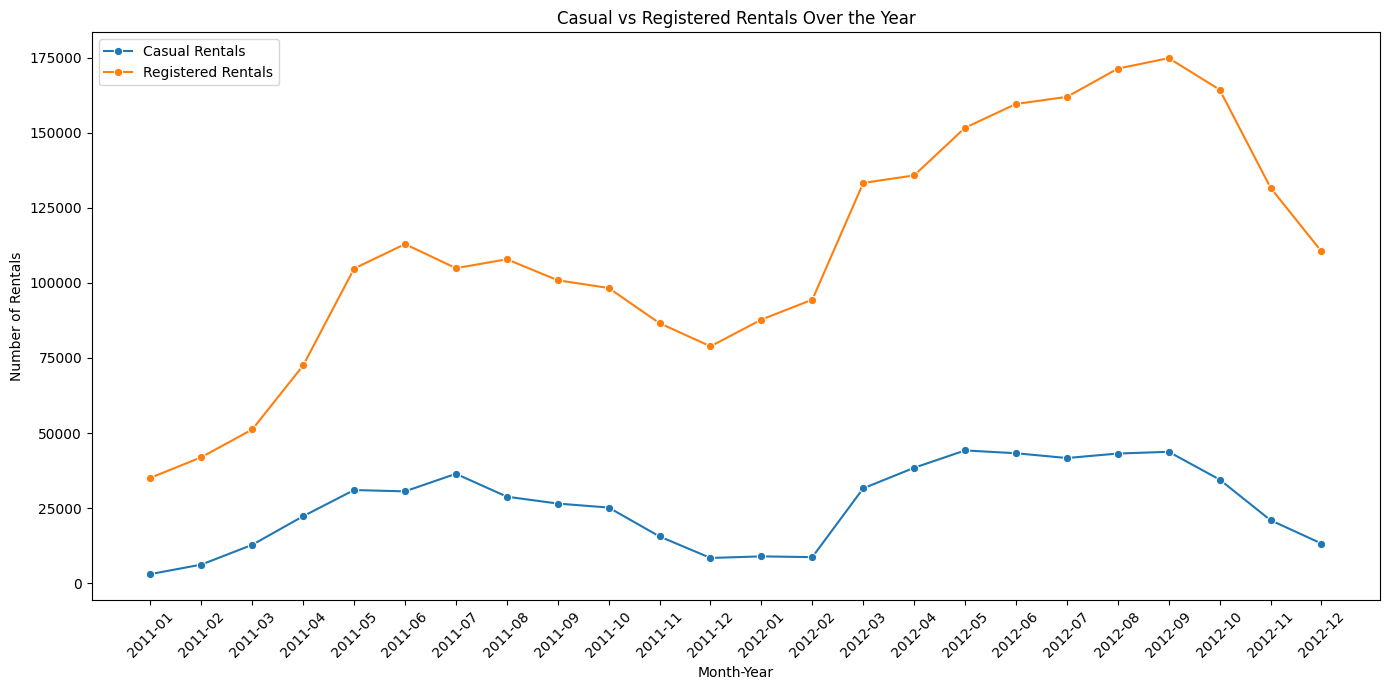

In [ ]:
monthly_data = df.groupby([df['dteday'].dt.to_period('M')]).agg({'casual': 'sum', 'registered': 'sum'}).reset_index()
monthly_data['dteday'] = monthly_data['dteday'].dt.strftime('%Y-%m')

fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(x='dteday', y='casual', data=monthly_data, ax=ax, marker='o', label='Casual Rentals')
sns.lineplot(x='dteday', y='registered', data=monthly_data, ax=ax, marker='o', label='Registered Rentals')
ax.set_title('Casual vs Registered Rentals Over the Year')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of Rentals')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Casual vs Registered Rentals By Hour of the Day

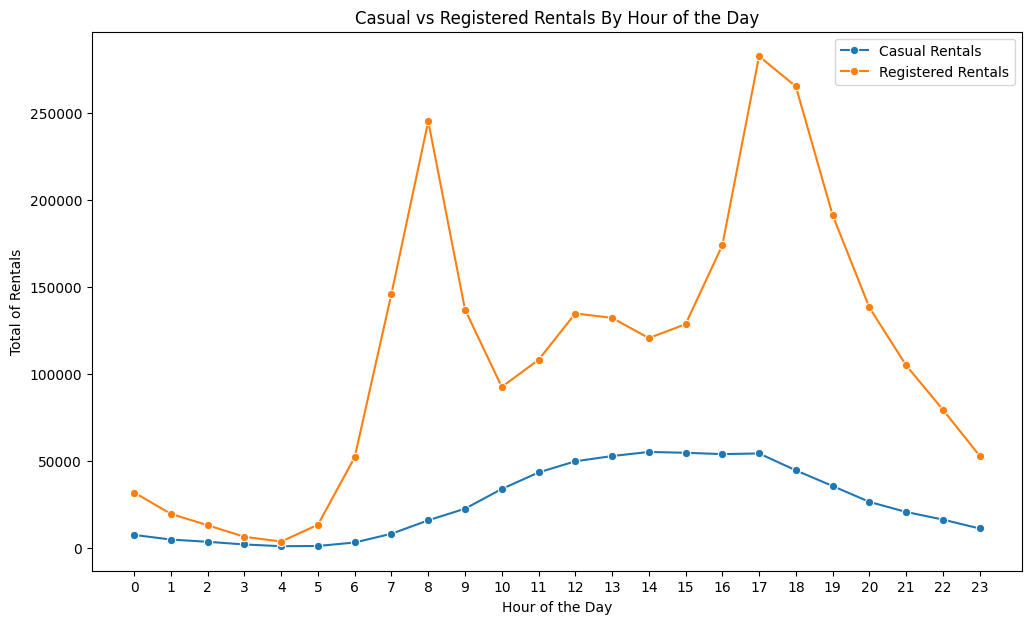

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(x='hr', y='casual', data=df.groupby('hr').agg({'casual': 'sum', 'registered': 'sum'}).reset_index(), ax=ax, marker='o', label='Casual Rentals')
sns.lineplot(x='hr', y='registered', data=df.groupby('hr').agg({'casual': 'sum', 'registered': 'sum'}).reset_index(), ax=ax, marker='o', label='Registered Rentals')
ax.set_title('Casual vs Registered Rentals By Hour of the Day')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Total of Rentals')
ax.set_xticks(range(24))
ax.set_xticklabels(range(24))
plt.legend()
plt.show()

#### Total Count of Bike Rentals During Weekdays and Weekends

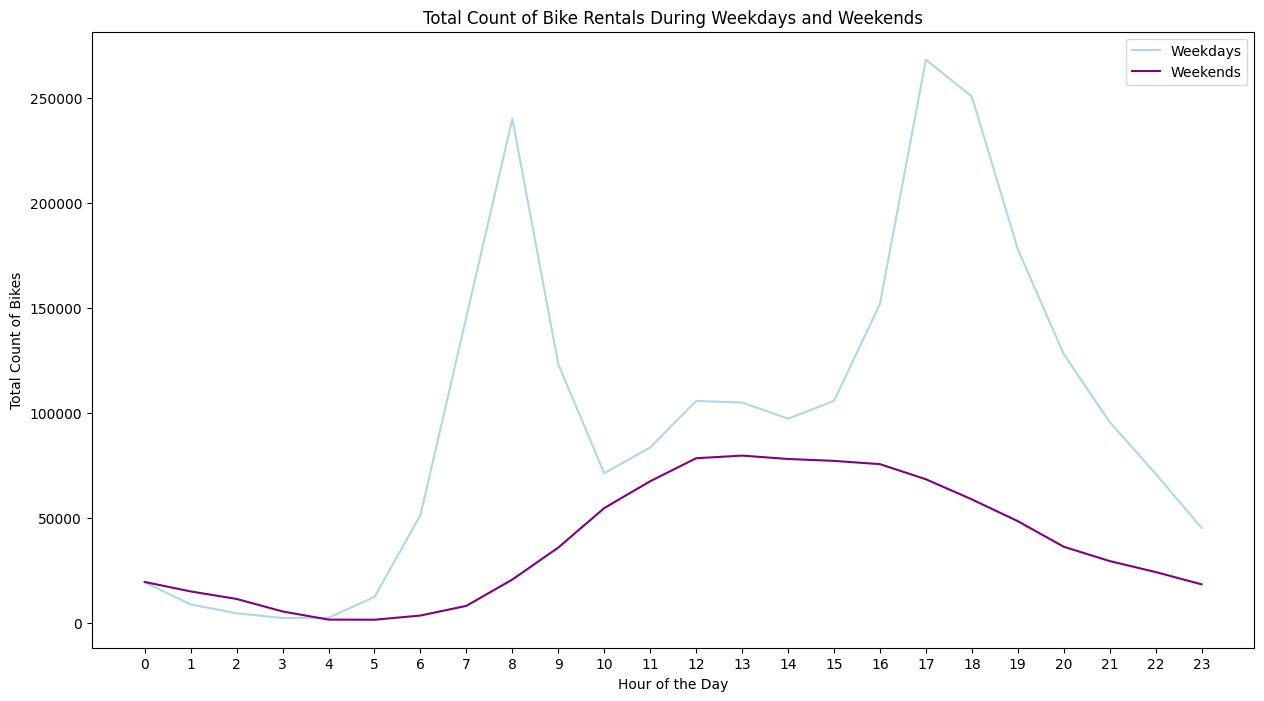

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
weekdays_data = df[df['weekday'].isin(range(1, 6))].groupby('hr')['cnt'].sum()
sns.lineplot(x=weekdays_data.index, y=weekdays_data, ax=ax, label='Weekdays', color='lightblue')
weekends_data = df[df['weekday'].isin([0, 6])].groupby('hr')['cnt'].sum()
sns.lineplot(x=weekends_data.index, y=weekends_data, ax=ax, label='Weekends', color='purple')
ax.set_title('Total Count of Bike Rentals During Weekdays and Weekends')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Total Count of Bikes')
ax.set_xticks(range(0, 24))
ax.set_xticklabels(range(0, 24))
ax.legend()
plt.show()

#### Comparison of Daily Temperature and Total Rentals Over Time'

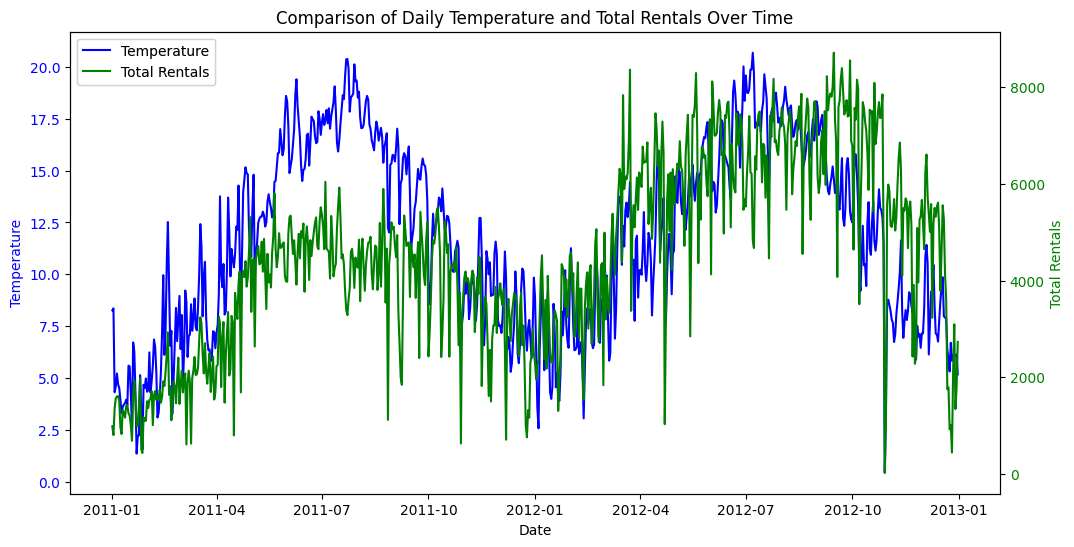

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(x=df.groupby('dteday').agg({'temp': 'sum', 'cnt': 'sum'}).index, y=df.groupby('dteday').agg({'temp': 'sum', 'cnt': 'sum'})['temp'], ax=ax1, color='blue', label='Temperature')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
sns.lineplot(x=df.groupby('dteday').agg({'temp': 'sum', 'cnt': 'sum'}).index, y=df.groupby('dteday').agg({'temp': 'sum', 'cnt': 'sum'})['cnt'], ax=ax2, color='green', label='Total Rentals')
ax2.set_ylabel('Total Rentals', color='green')
ax2.tick_params(axis='y', labelcolor='green')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Comparison of Daily Temperature and Total Rentals Over Time')
plt.show()


#### Distribution of Wind Speeds

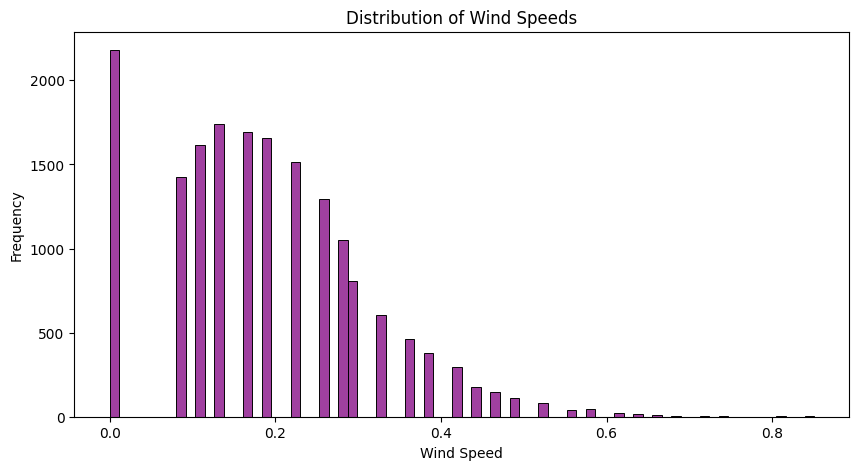

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x='windspeed', color='purple', ax=ax)
ax.set_title('Distribution of Wind Speeds')
ax.set_xlabel('Wind Speed')
ax.set_ylabel('Frequency')
plt.show()

#### Relationship Between Temperature and Bike Rentals

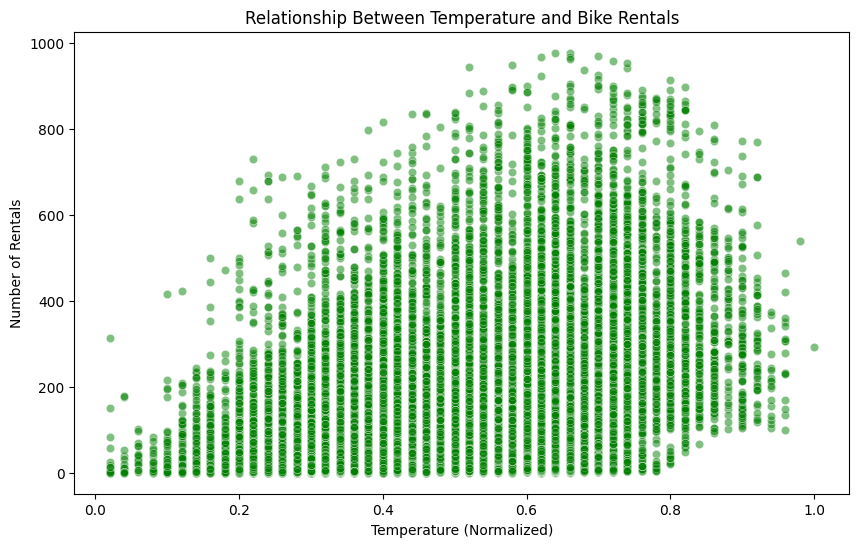

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df, ax=ax, color='green', alpha=0.5)
ax.set_title('Relationship Between Temperature and Bike Rentals')
ax.set_xlabel('Temperature (Normalized)')
ax.set_ylabel('Number of Rentals')
plt.show()

#### Relationship Between Humidity and Total Rentals

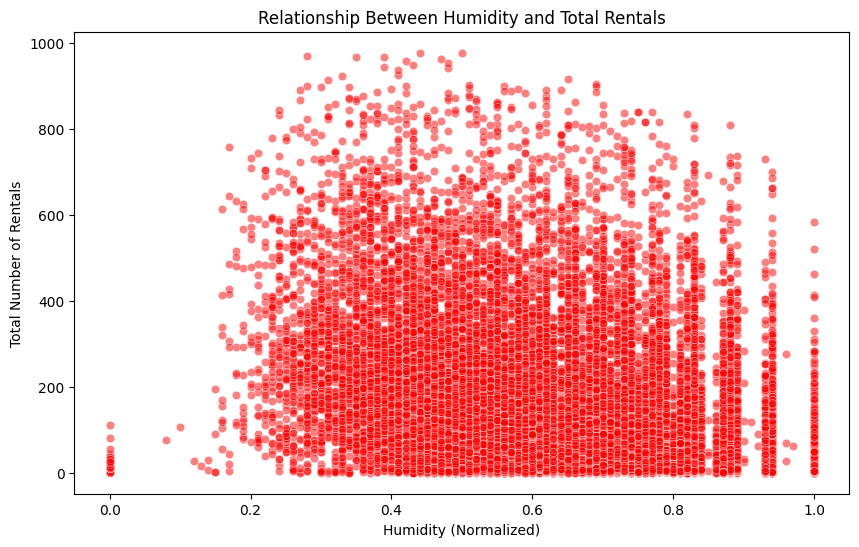

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=df, ax=ax, color='red', alpha=0.5)
ax.set_title('Relationship Between Humidity and Total Rentals')
ax.set_xlabel('Humidity (Normalized)')
ax.set_ylabel('Total Number of Rentals')
plt.show()


#### Correlation Matrix

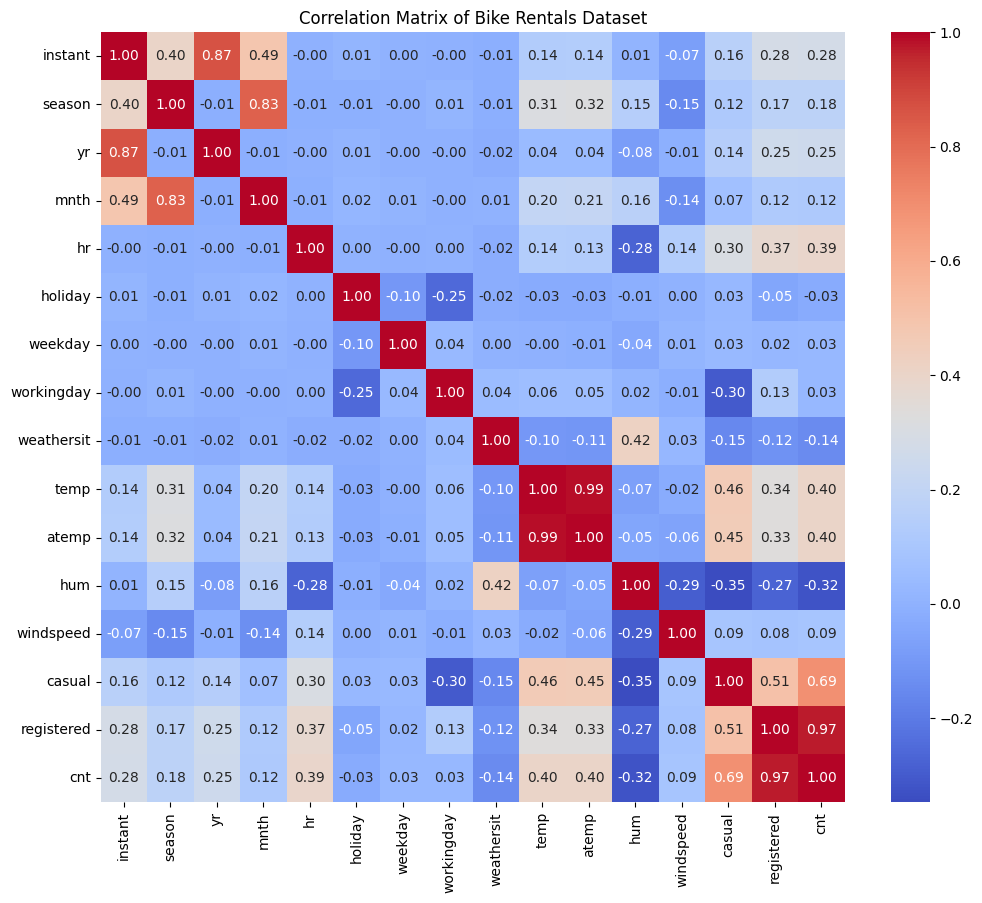

In [ ]:
categorical_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols:
    df_copy[col] = df_copy[col].astype('category').cat.codes
correlation_matrix = df_copy.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Bike Rentals Dataset')
plt.show()

## Modeling

### Remove Reduntant Columns For Training

In [ ]:
df.drop(columns = ['instant' , 'dteday' , 'yr'], inplace=True)

### One Hot Encoding

In [ ]:
train_df = df
def one_hot_encoding(dataframe, column):
    dummies = pd.get_dummies(dataframe[column], prefix=column, drop_first=True)
    dummies = dummies.astype(int)
    dataframe = pd.concat([dataframe, dummies], axis=1)
    dataframe = dataframe.drop([column], axis=1)
    return dataframe
cols = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in cols:
    train_df = one_hot_encoding(train_df, col)
train_df.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
0,0.24,0.2879,0.81,0.0,3,13,16,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0,8,32,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0,5,27,32,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0,3,10,13,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Implement Featurewiz to find best features for training

In [ ]:
columns_to_add = ['hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23']

In [ ]:
train_df_hrless = train_df.drop(columns=columns_to_add)

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
    Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
    Single_Label Regression problem 
    Loaded train data. Shape = (17379, 32)
    Single_Label Regression problem 
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
    Single_Label Regression problem 
    loading a sequential sample of 10000 rows into pandas for EDA
#######################################################################

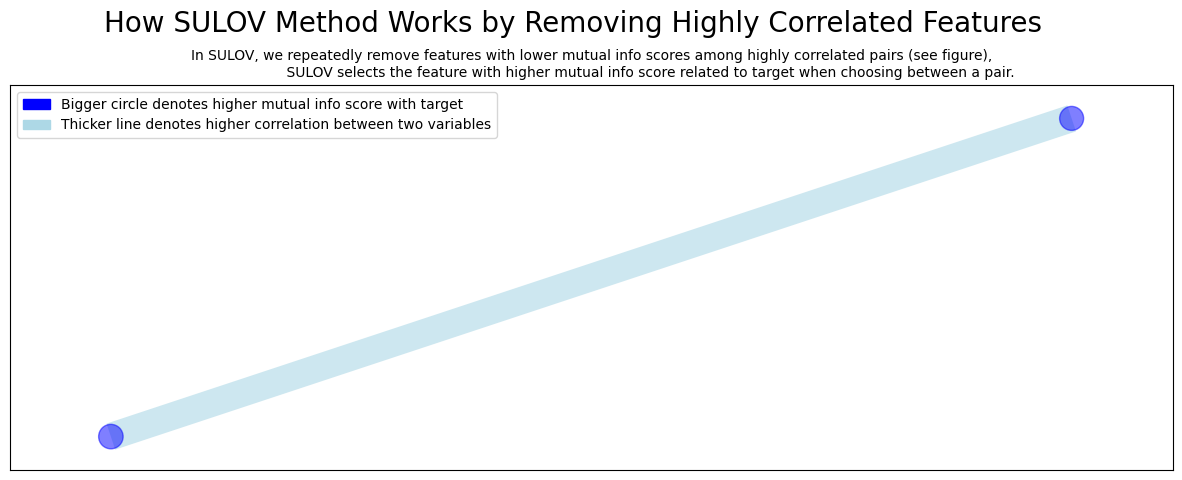

Time taken for SULOV method = 0 seconds
    Adding 0 categorical variables to reduced numeric variables  of 30
Final list of selected 30 vars after SULOV = ['hum', 'windspeed', 'casual', 'registered', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_1', 'weathersit_2', 'weathersit_3', 'weathersit_4', 'atemp']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 7 features per iteration...
    Number of booster rounds = 100
        Selected: ['registered', 'casual', 'hum', 'ate

In [ ]:
selected_features, transformed_data = featurewiz(
        train_df_hrless,
        'cnt',
        corr_limit=0.70,
        verbose=1,
           )

In [ ]:
transformed_data[columns_to_add] = train_df[columns_to_add]

In [ ]:
target = train_df['cnt']

### Train Model

In [ ]:
def train(model):
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
    scores = {}
    for metric in ['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error']:
        score = model_selection.cross_val_score(model, transformed_data, target, cv=kfold, scoring=metric)
        scores[metric] = abs(score.mean())
    print('Model:', model)
    for metric, score in scores.items():
        print(f'{metric[4:]}: {score}')


#### Decision Tree

In [ ]:
train(DecisionTreeRegressor())

Model: DecisionTreeRegressor()
mean_absolute_error: 0.047585814198918414
root_mean_squared_error: 0.42551771997962734
mean_absolute_percentage_error: 5.8230848500377405e-05


#### Random Forest

In [ ]:
train(RandomForestRegressor())

Model: RandomForestRegressor()
mean_absolute_error: 0.03340043678074017
root_mean_squared_error: 0.24516365674068635
mean_absolute_percentage_error: 4.540330684614952e-05


#### Gradient Boosting

In [ ]:
train(GradientBoostingRegressor())

Model: GradientBoostingRegressor()
mean_absolute_error: 0.987440915261495
root_mean_squared_error: 1.4633713365604728
mean_absolute_percentage_error: 0.01265113399557983


#### KNN

In [ ]:
train(KNeighborsRegressor(metric='manhattan'))

Model: KNeighborsRegressor(metric='manhattan')
mean_absolute_error: 0.6488271512925537
root_mean_squared_error: 1.4664639238806427
mean_absolute_percentage_error: 0.005633804588726354
